In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import analytics as als
import treatment as trm
import visualization as vzl

In [6]:
feature_str, feature_int = als.get_lists_type_feature(train, list(train))

In [7]:
trm.fill_gaps(train, feature_str, 'nan_category')

In [8]:
train = train.dropna()

## Зависимость вещественных переменных

#### На первом этапе стоит посмотреть как распределены и связаны вещественные признаки

In [9]:
feature_int

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

#### Рассмотрим зависимость суммы кредита и дохода клиентов. 

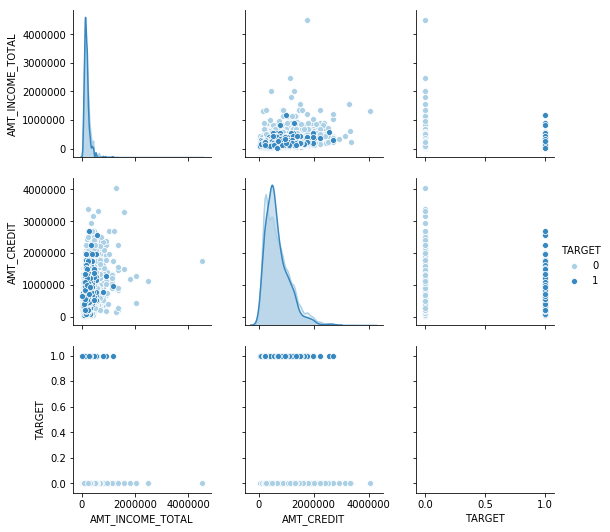

In [10]:
vzl.compare_numerical_features(train, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET'], "Blues")

#### По графикам видно, что плотность распределения признаков очень схожа для тех, кто вернул кредит и не вернул. Также заметно, что не возвращают кредиты те люди, у которых доход ниже среднего, что и логично (однако такие люди иногда берут большие кредиты). 

#### Рассмотрим зависимость количества детей в семьей и величины кредита.

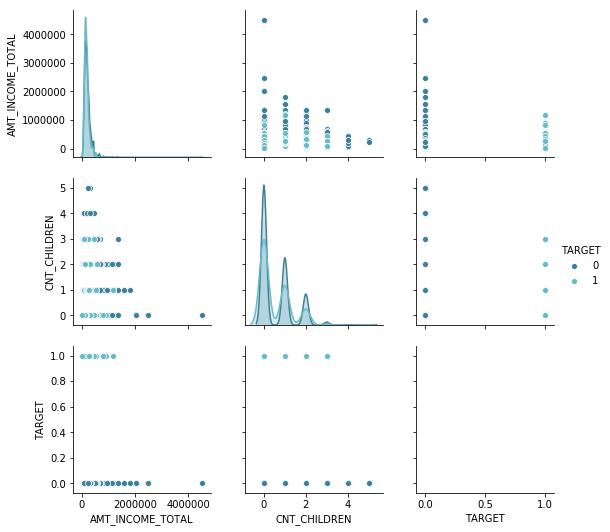

In [11]:
vzl.compare_numerical_features(train, ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'TARGET'], "GnBu_d")

#### По графикам видно, что больше богатых людей из тех, кто имеет меньше детей. Также видно, что люди с маленьким количеством детей(или их отсутсвием) чаще кредиты не возвращают. 

#### Рассмотрим зависимость региона и дохода клиентов.

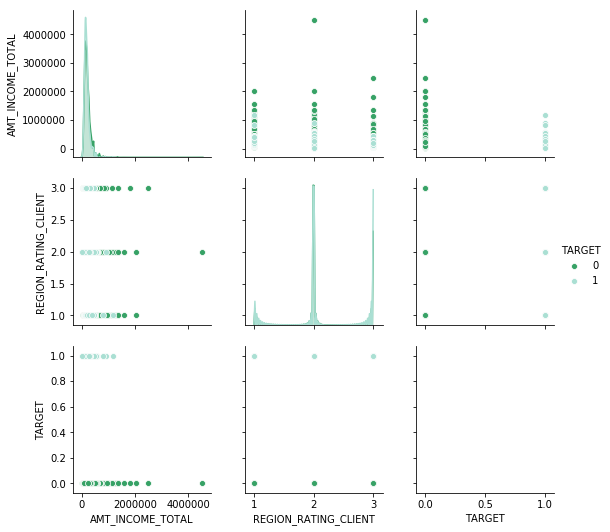

In [12]:
vzl.compare_numerical_features(train, ['AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT',
                                       'TARGET'], "BuGn_r")

#### По графикам видно, что нет какой-то четкой зависимости между регионами, доходом и тем, какие люди не возвращают кредит.

#### Стоит сравнивать цены на товары (для потребительских товаров) и величину кредита. 

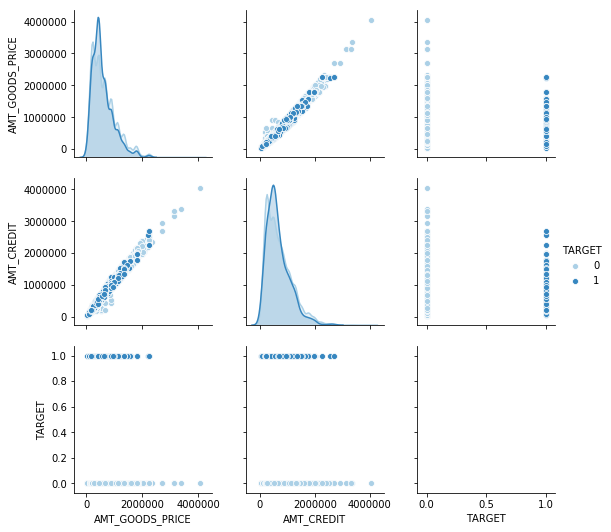

In [13]:
vzl.compare_numerical_features(train, ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'TARGET'], "Blues")

#### Видно, что связь между этими переменными линейная, но какой-то четкой зависимости с тагретом не видно (кроме того, что было замечено ранее).

#### Стоит рассмотреть зависимость оценок из других источников.

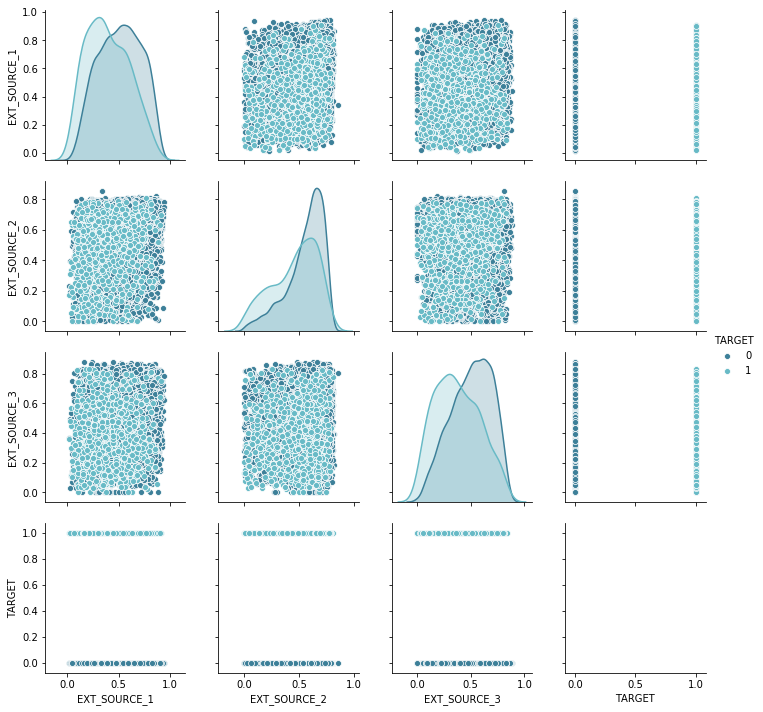

In [18]:
vzl.compare_numerical_features(train, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET'], "GnBu_d")

#### Видно, что распределения отличаются для людей, которые вернули и не вернули кредит. Кажется, что переменная 'EXT_SOURCE_2' должна иметь высокое значение, так распределения значительно отличаются.

## Зависимость категориальных и вещественных признаков 

In [15]:
feature_int

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [16]:
feature_str

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

#### Стоит проанализировать зависимость между гендерным признаком и разными вещественными признаками.

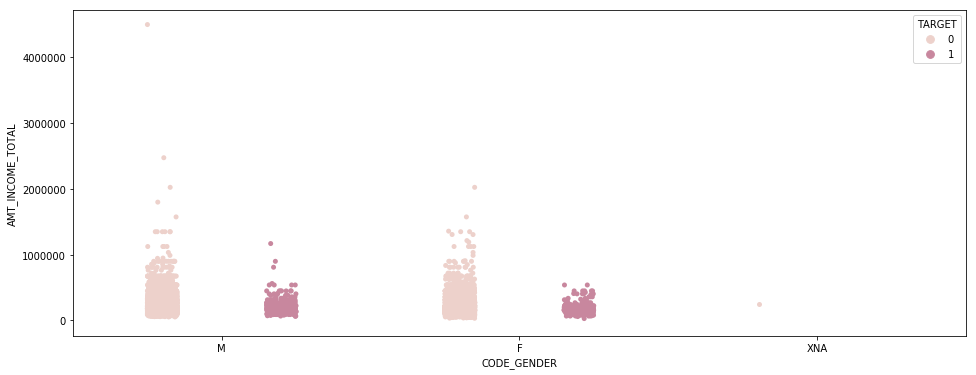

In [22]:
vzl.compare_numerical_and_categorical_features(train, 'CODE_GENDER', 'AMT_INCOME_TOTAL', 
                                               sns.cubehelix_palette(4), True)

#### Видно, что мужчины немного чаще не возвращают кредит, а доходы между категориями достаточно равномерно распределены.

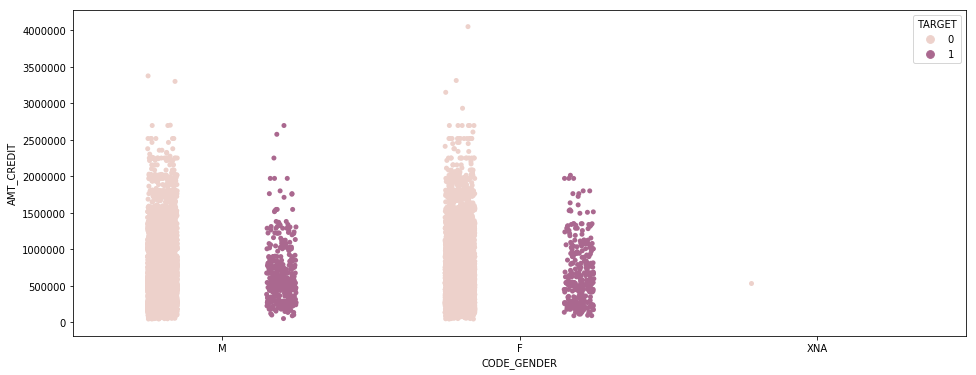

In [56]:
vzl.compare_numerical_and_categorical_features(train, 'CODE_GENDER', 'AMT_CREDIT', 
                                               sns.cubehelix_palette(3), True)

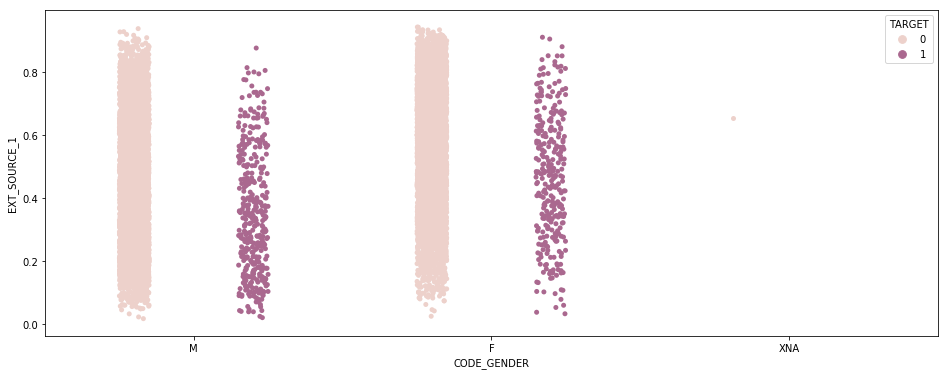

In [55]:
vzl.compare_numerical_and_categorical_features(train, 'CODE_GENDER', 'EXT_SOURCE_1', 
                                              sns.cubehelix_palette(3), True)

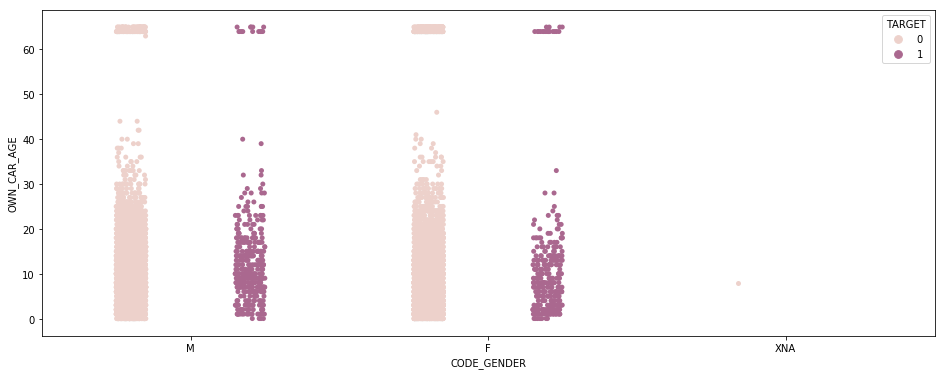

In [30]:
vzl.compare_numerical_and_categorical_features(train, 'CODE_GENDER', 'OWN_CAR_AGE', 
                                               sns.cubehelix_palette(3), True)

#### По графикам видно, что нет четких отличий между мужчинами и женщинами. Стоит отдельо проверить и другие категории.

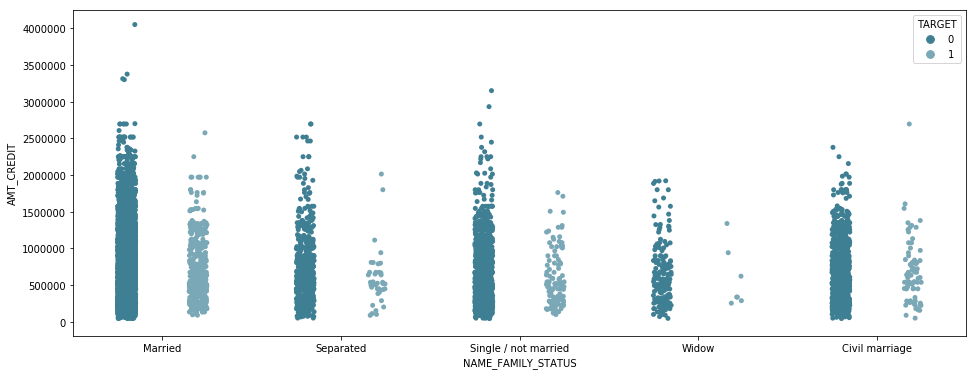

In [54]:
vzl.compare_numerical_and_categorical_features(train, 'NAME_FAMILY_STATUS', 'AMT_CREDIT', 
                                             sns.diverging_palette(220, 20, n=7), True)

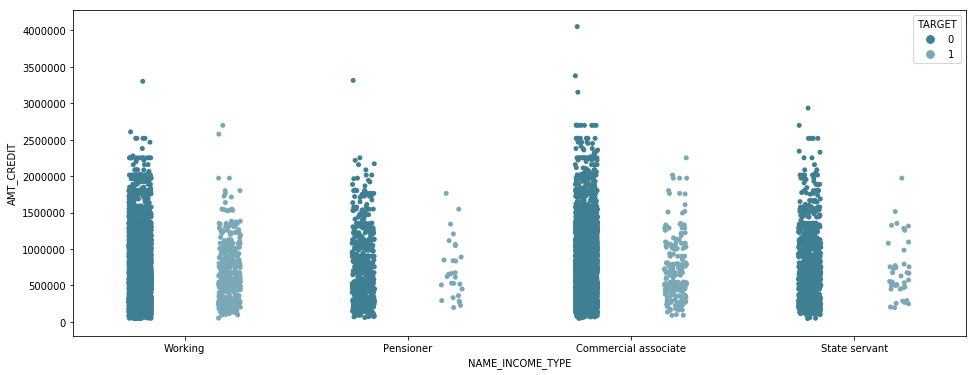

In [45]:
vzl.compare_numerical_and_categorical_features(train,  'NAME_INCOME_TYPE', 'AMT_CREDIT', 
                                               sns.diverging_palette(220, 20, n=7), True)

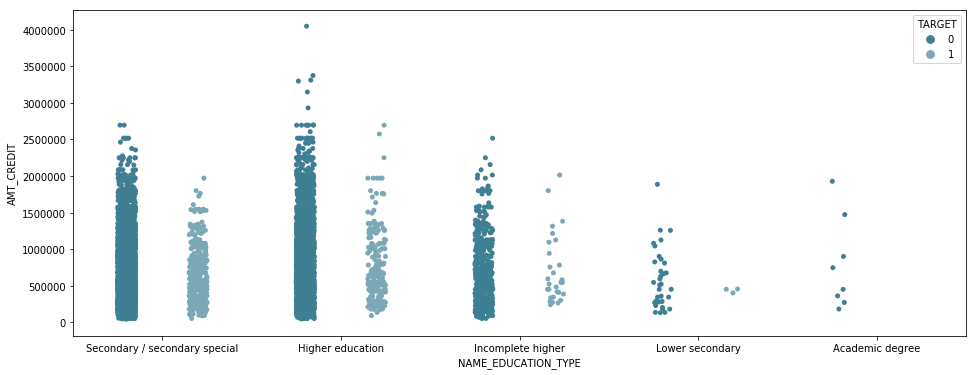

In [46]:
vzl.compare_numerical_and_categorical_features(train, 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 
                                               sns.diverging_palette(220, 20, n=7), True)

#### Уже на данном этапе видно, что большинство людей, которые не возвращают кредит работают и находятся в браке. Также видно, что чем выше образование, тем чаще люди возвращают кредиты. Стоит более детально изучить категории.

## Анализ категориальных признаков

#### На первый взгляд кажется, что из категориальных признаков нужно рассмотреть пол, тип кредита, вид трудовой деятельности, образование, семейный статус, вид жилья, профессия и тип рабочей организации. 

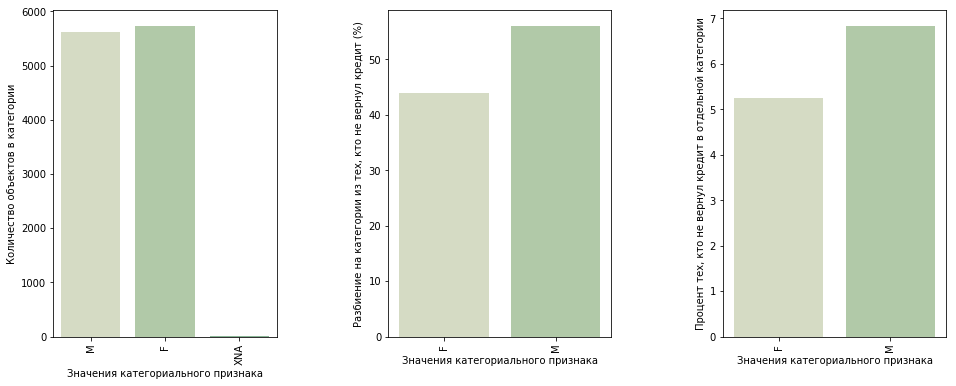

In [21]:
vzl.get_stat_category_features(train, 'CODE_GENDER', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

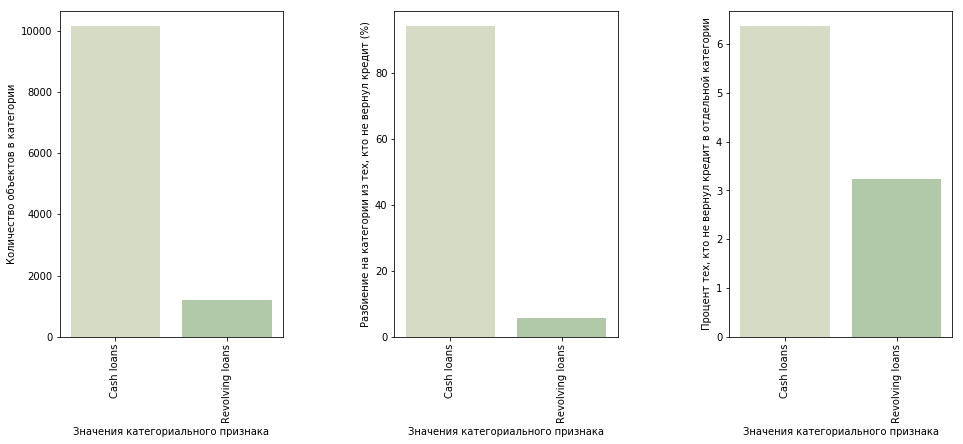

In [20]:
vzl.get_stat_category_features(train, 'NAME_CONTRACT_TYPE', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### По диаграммам видно, что чаще берут кредит наличными и 80% из тех, кто не вернул кредит, были люди, которые брали наличными. Однако, нельзя сказать, что это какой-то весомый признак, это скорее связано с дисбалансом в выборке (хотя около 7% из тех, кто взял кредит наличными, не вернули его. В то время как, только 3% людей, которые брали возобновляемый кредит, не вернули ссуду)

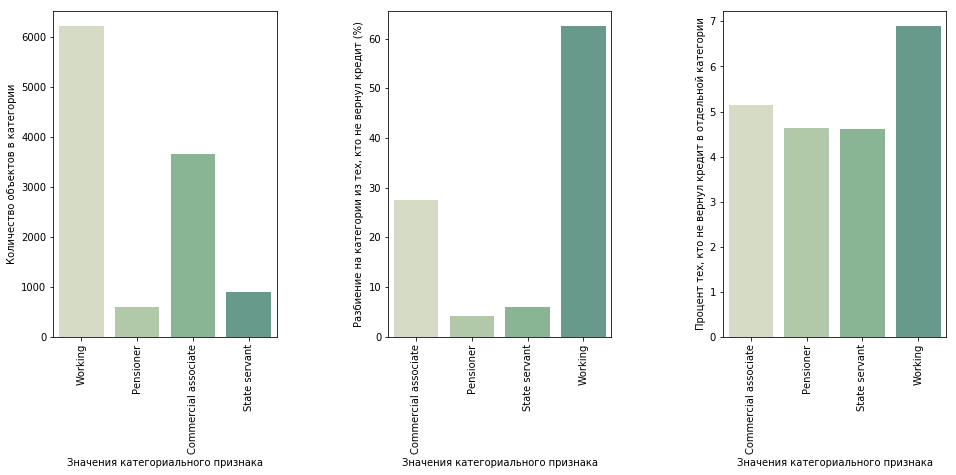

In [22]:
vzl.get_stat_category_features(train, 'NAME_INCOME_TYPE', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### Тут ситуации похожая. БОльшая дола просроченных кредитов принадлежит работающим людям, их в выборке больше, но и они чаще кредит не возвращают. 

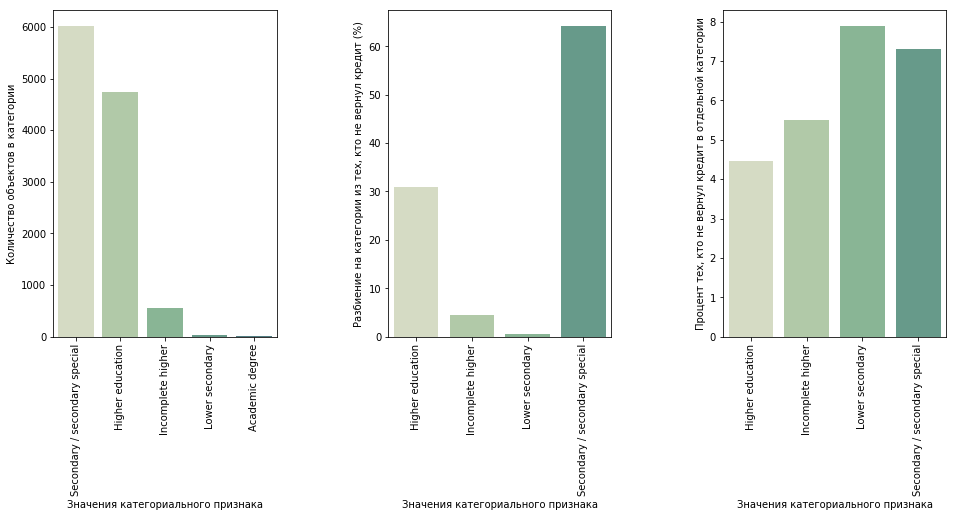

In [23]:
vzl.get_stat_category_features(train, 'NAME_EDUCATION_TYPE', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### В выборе мало людей со среднем образованием, однако, они реже всего возвращают кредиты. 

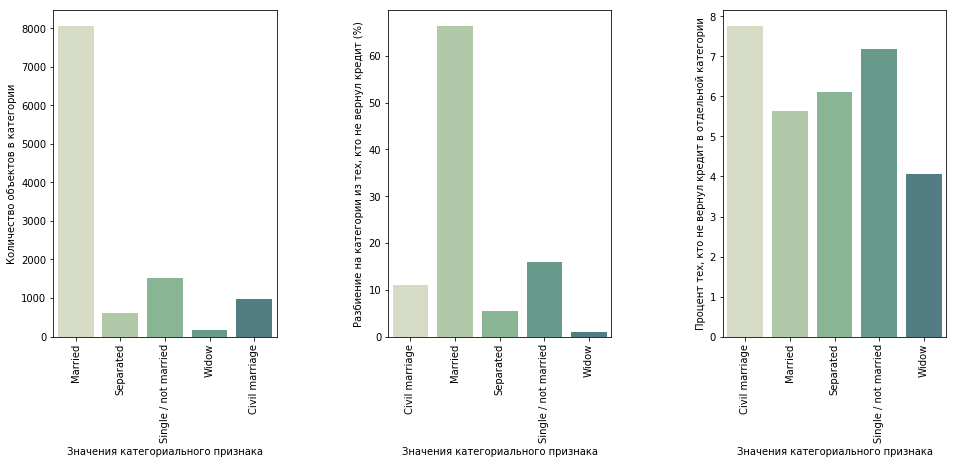

In [24]:
vzl.get_stat_category_features(train, 'NAME_FAMILY_STATUS', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

#### В выборке больше всего людей состоящих в браке, также они занимают большую часть людей, которые кредиты не вернули. Однако, чаще всего не возвращают кредиты одинокие и проживающие в гражданском браке. 

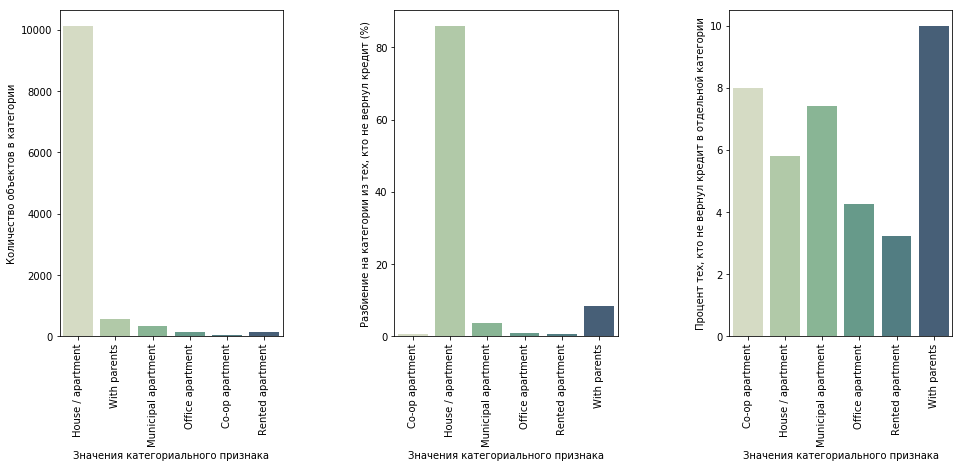

In [25]:
vzl.get_stat_category_features(train, 'NAME_HOUSING_TYPE', sns.cubehelix_palette(8, start=.5, rot=-.75), True)

In [ ]:
###

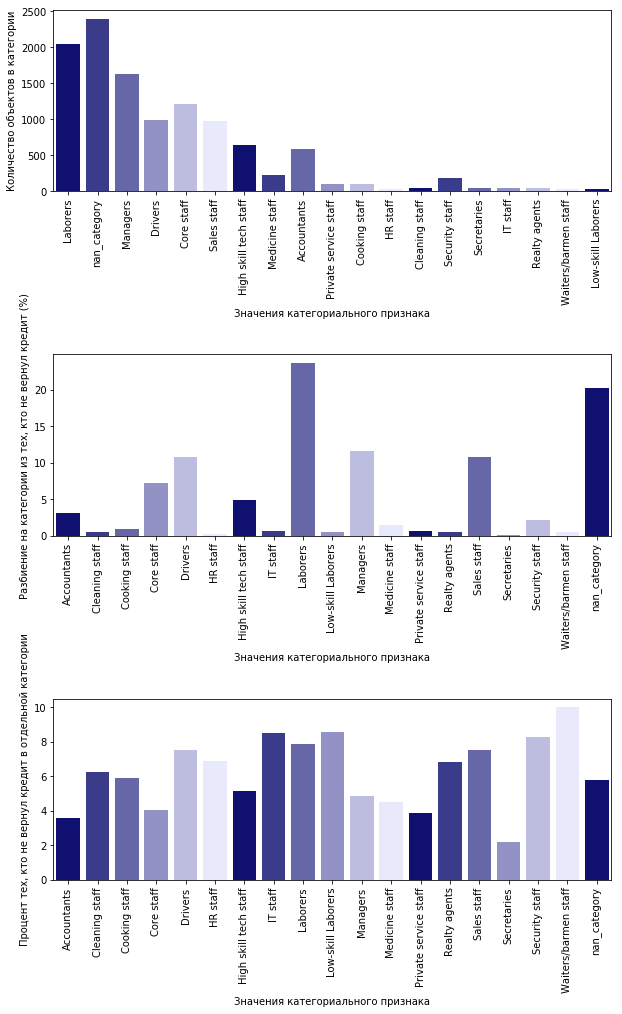

In [18]:
vzl.get_stat_category_features(train, 'OCCUPATION_TYPE', sns.light_palette("navy", reverse=True), False)

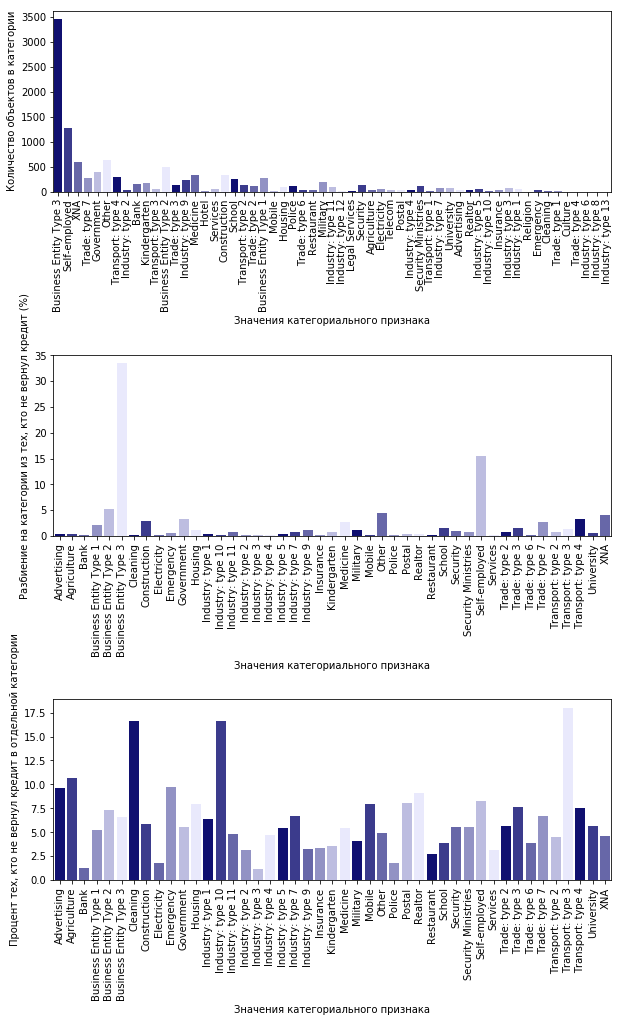

In [19]:
vzl.get_stat_category_features(train, 'ORGANIZATION_TYPE', sns.light_palette("navy", reverse=True), False)

## Корреляция